# Covid prediction

**Descripción**: Covid prediction es un Notebook que en base a un Dataset de Kaggle es capaz de predecir con una accuracy del 97% si una persona tiene COVID-19 o no.

**Autor**: Marc Nebot Moyano

**Fecha**: 07/07/2022

## 1. Análisis del Dataset

In [373]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Observación de los datos leídos

El DataSet escogido es un DataSet que incluye pacientes con COVID-19 y sin COVID-19 con sus respectivos síntomas. Seguidamente podremos ver con qué tipos de datos tratamos para transformarlos debidamente junto con sus anomalías.

In [374]:
df = pd.read_csv('Covid Dataset.csv')
df

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,Yes,Yes,No,Yes,Yes,Yes,Yes,No,No,No,...,Yes,Yes,No,No,No,No,No,No,No,Yes
5430,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,...,Yes,No,No,No,No,No,No,No,No,Yes
5431,Yes,Yes,Yes,No,No,No,No,No,Yes,No,...,No,No,No,No,No,No,No,No,No,No
5432,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,No,...,No,No,No,No,No,No,No,No,No,No


A continuación, comprobaremos que no hayan datos erróneos o sin sentido, número negativos donde no tocan, ceros... 

Podemos ver que todos los datos son correctos y no hay valores sin sentido ya que todas las columnas tienen Yes y No

In [375]:
df.describe()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
count,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,...,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,1,1,2
top,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,No,...,Yes,No,No,Yes,No,Yes,No,No,No,Yes
freq,3620,4273,4307,3953,2952,2920,2869,2736,2911,2846,...,2821,2883,2983,2726,2924,2820,3172,5434,5434,4383


### Visualización de valores NaN

Podemos observar que no hay valores NaN, por lo tanto, no hace falta tratarlos pues todos los datos tienen algún valor

In [376]:
df.isnull().sum()

Breathing Problem                          0
Fever                                      0
Dry Cough                                  0
Sore throat                                0
Running Nose                               0
Asthma                                     0
Chronic Lung Disease                       0
Headache                                   0
Heart Disease                              0
Diabetes                                   0
Hyper Tension                              0
Fatigue                                    0
Gastrointestinal                           0
Abroad travel                              0
Contact with COVID Patient                 0
Attended Large Gathering                   0
Visited Public Exposed Places              0
Family working in Public Exposed Places    0
Wearing Masks                              0
Sanitization from Market                   0
COVID-19                                   0
dtype: int64

Tampoco hay valores iguales a 0, pues si hubiera valores iguales a 0 en el DataFrame de Yes y No sería lo mismo que NaN

In [377]:
(df == 0).sum()

Breathing Problem                          0
Fever                                      0
Dry Cough                                  0
Sore throat                                0
Running Nose                               0
Asthma                                     0
Chronic Lung Disease                       0
Headache                                   0
Heart Disease                              0
Diabetes                                   0
Hyper Tension                              0
Fatigue                                    0
Gastrointestinal                           0
Abroad travel                              0
Contact with COVID Patient                 0
Attended Large Gathering                   0
Visited Public Exposed Places              0
Family working in Public Exposed Places    0
Wearing Masks                              0
Sanitization from Market                   0
COVID-19                                   0
dtype: int64

# 1. Análisis de gráficas


### Frecuencias

Seguidamente observaremos cómo son nuestras muestras para ver si tenemos una muestra desbalanceada o no. En el siguiente gráfico podemos ver que el número de muestras de personas que tienen COVID-19 es mayor que las que no tienen COVID-19.

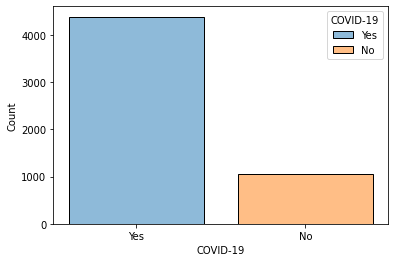

In [378]:
sns.histplot(df, x='COVID-19', hue='COVID-19', shrink = 0.8)

Relación entre problemas respiratorios y COVID-19

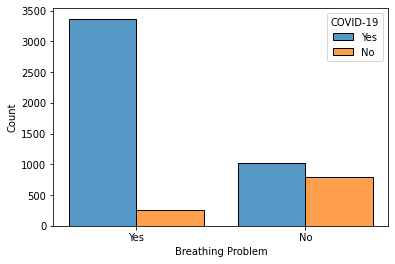

In [379]:
sns.histplot(df, x='Breathing Problem', hue='COVID-19', multiple="dodge", shrink=0.8);

Relación entre dolor de garganta y COVID-19

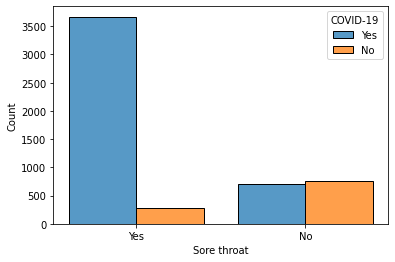

In [380]:
sns.histplot(df, x='Sore throat', hue='COVID-19', multiple="dodge", shrink=0.8);

Relación entre visitar espacios públicos y COVID-19

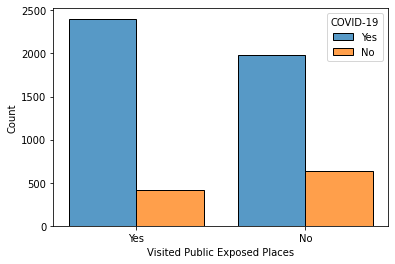

In [381]:
sns.histplot(df, x='Visited Public Exposed Places', hue='COVID-19', multiple="dodge", shrink=0.8);

### Tratamos Dataset

Seguidamente trataremos el Dataset, al contar con variables categóricas de Yes y No que representan los síntomas de los pacientes, vamos a transformar los Yes en 1 y los No en 0 para obtener una mayor tratabilidad.

In [382]:
df.replace('Yes',1,inplace = True)
df.replace('No',0,inplace = True)   #inplace True para no devolver copia
df

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,...,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,...,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,...,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,...,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,1,1,0,1,1,1,1,0,0,0,...,1,1,0,0,0,0,0,0,0,1
5430,1,1,1,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
5431,1,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5432,1,1,1,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


### Correlaciones

Observaremos la matriz de correlaciones donde podemos observar que a pesar de estar ppoco correlacionados con COVID-19 los elementos de la matriz tenemos algunos que destacan como pueden ser *Breathing Problem* , *Fever*, *Dry Cough*, *Sore throat*, *Abroad travel*, *Contact with COVID Patient* y *Attended Large Gathering*

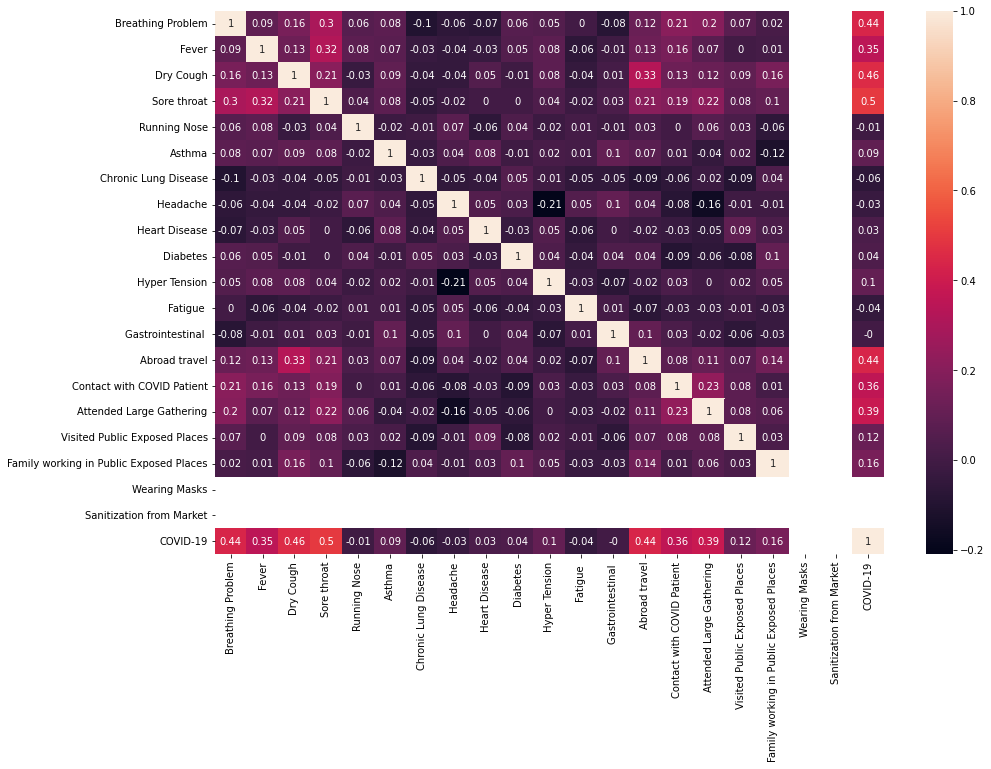

In [383]:
correlation_matrix = df.corr().round(2) # arrodonir a 2 decimals
plt.figure(figsize = (15,10))
sns.heatmap(data = correlation_matrix, annot = True);

Por lo tanto, después de observar la matriz de correlaciones y razonar, he decidido tratar solo los elementos con correlación >= 0.35 excluyendo todos los demás.

In [384]:
corr_target = correlation_matrix.loc['COVID-19',:]
corr_target[np.abs(corr_target) >= 0.35]

Breathing Problem             0.44
Fever                         0.35
Dry Cough                     0.46
Sore throat                   0.50
Abroad travel                 0.44
Contact with COVID Patient    0.36
Attended Large Gathering      0.39
COVID-19                      1.00
Name: COVID-19, dtype: float64

# Modelos

A continuación, comprobaremos la precisión de distintos modelos para así escoger el que mejores resultados nos de como modelos final.

### Import de librerías necesarias

Para esto he necesitado las siguientes librerías que proyectarán los resultados de los correspondientes modelos.





In [385]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

### Selección de columnas

Seguidamente, seleccionaré las columnas que he mencionado antes con correlación mayor a 0.35 para entrenar los modelos y utilizaré como variable *y* COVID-19 ya que es lo que quiero predecir dados unos síntomas como inputs.

In [386]:
X = pd.concat((df['Breathing Problem'], df['Sore throat'], df['Dry Cough'], df['Abroad travel'], df['Contact with COVID Patient'], df['Contact with COVID Patient'], df['Fever']), axis = 1)
y = df['COVID-19']

### Estandarización

A continuación haremos la estandarización de los datos separándolos en dos
grupos, un 75% serán de training y el otro 25% serán de testing

In [387]:
X_std = StandardScaler().fit_transform(X)
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(X_std, y, test_size = 0.25, random_state = 7)
X_train_std

array([[ 0.70788768,  0.61208836,  0.51153402, ...,  0.99669299,
         0.99669299,  0.52125432],
       [-1.41265348, -1.63375104, -1.95490419, ...,  0.99669299,
         0.99669299, -1.91844935],
       [ 0.70788768, -1.63375104, -1.95490419, ..., -1.00331798,
        -1.00331798,  0.52125432],
       ...,
       [ 0.70788768,  0.61208836,  0.51153402, ...,  0.99669299,
         0.99669299,  0.52125432],
       [ 0.70788768,  0.61208836,  0.51153402, ...,  0.99669299,
         0.99669299,  0.52125432],
       [-1.41265348, -1.63375104, -1.95490419, ..., -1.00331798,
        -1.00331798, -1.91844935]])

## Regresión Logística

Primeramente comenzaremos con Regresión Logística para clasificar los datos así que lo entrenaremos

In [388]:
logistic = LogisticRegression()
logistic.fit(X_train_std, y_train_std)

LogisticRegression()

Aquí tenemos una matriz de confusión ddel modelo para próximamente compararla con los otros modelos.

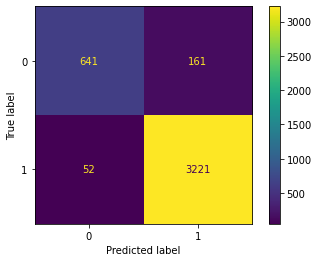

In [389]:
y_pred = logistic.predict(X_train_std)
confusio = confusion_matrix(y_train_std.values, y_pred)
ConfusionMatrixDisplay(confusio).plot();

### Accuracy de regresión logística

Seguidamente calcularemos la Accuracy, Precision, F1 y Recall de nuestro modelo

In [390]:
total = np.sum(confusio)

TP = confusio[1,1]
TN = confusio[0,0]

FP = confusio[0,1]
FN = confusio[1,0]

precision = TP / (TP + FP)
print('Precision: ', precision)

recall = TP / (TP + FN)
print('Recall: ', recall )

F1 = 2 * TP / (2 * TP + FN + FP)
print('F1-Score: ', F1)

accuracy = (TP + TN) / (TP + FN + TN + FP)
print('Accuracy: ', accuracy)

Precision:  0.952395032525133
Recall:  0.9841124350748549
F1-Score:  0.9679939894815928
Accuracy:  0.9477300613496933


También calucularemos la accuracy de nuestro modelo mediante cross validation

In [391]:
round(cross_val_score(logistic, X_train_std, y_train_std, cv = 5, scoring="accuracy").mean(), 4)

0.9477

## Árboles de decisión

El segundo modelo que probaremos para este problema serán los árboles de decisión los cuáles en una clasificación binaria pueden ser realmente efectivos.

In [392]:
dtc = tree.DecisionTreeClassifier()
dtc.fit(X_train_std, y_train_std)

DecisionTreeClassifier()

Podemos observar una accuracy muy similar a la regresión logística, ambas muy altas.

In [393]:
round(cross_val_score(dtc, X_train_std, y_train_std, cv = 5, scoring="accuracy").mean(), 4)

0.9531

Para mostrar cómo ha hecho el modelo para clasificar las personas que tienen COVID de las que no, procedemos a mostrar una ilustración del árbol binario generado:

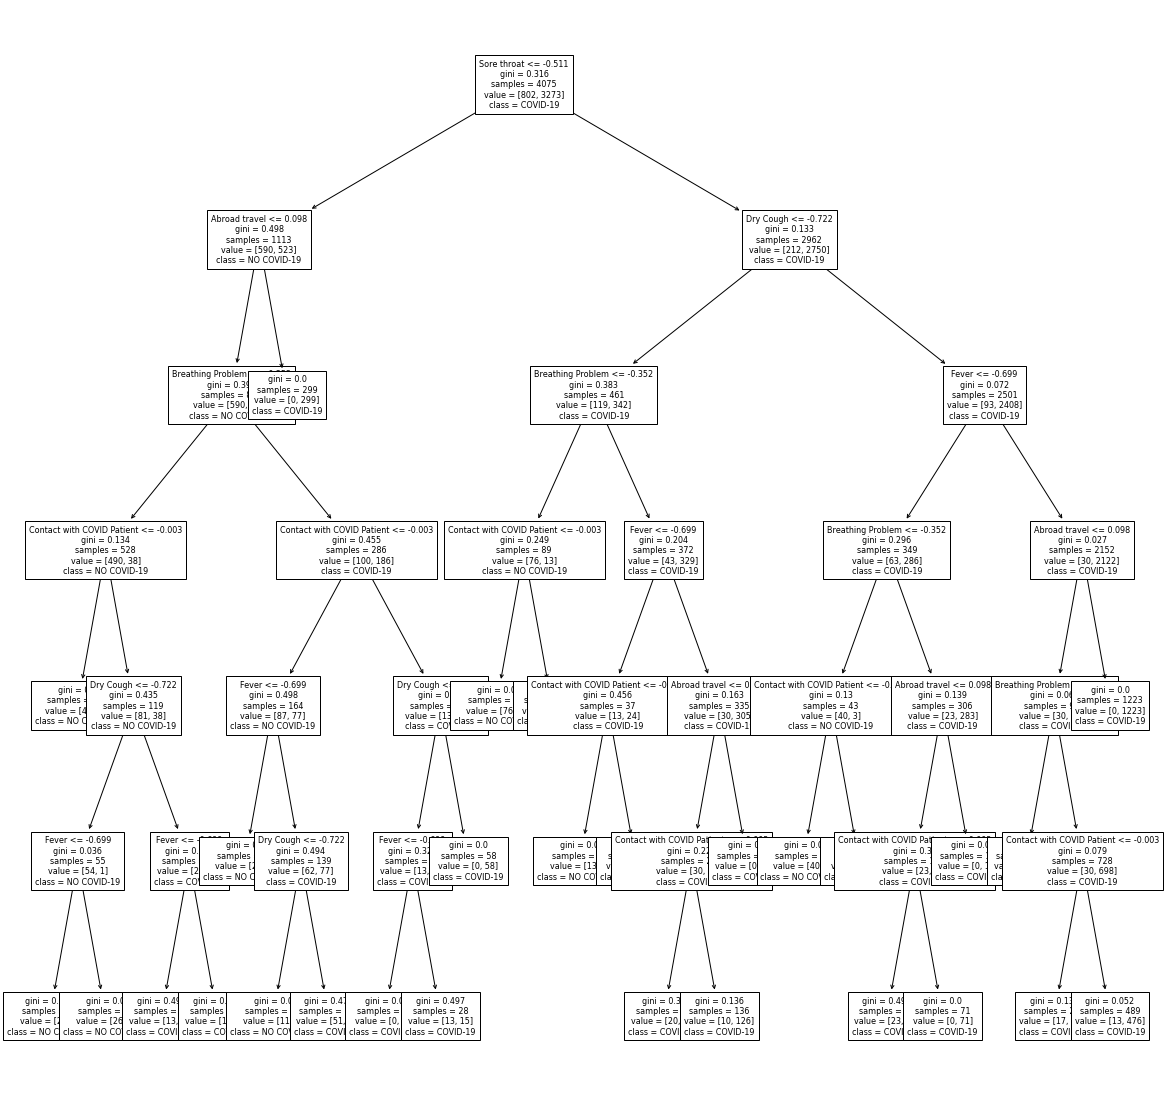

In [394]:
plt.figure(figsize=(20,20))
tree.plot_tree(dtc, fontsize=8, class_names =['NO COVID-19', 'COVID-19'], feature_names = X.columns)
plt.show()

## Support Vector Machine

En tercer lugar optaremos por probar Support Vector Machine para entrenar nuestro modelo y observar así su accuracy ya que este nos puede devolver muy buenos resultados

Aplicaremos GridSearch para probar distintos hyperparámetros de kernel, C y gamma obteniendo así los siguientes resultados:


*   C = 0.31622776601683794
*   Gamma = 100000.0
*   Kernel = Radial Basis Function





In [395]:
Cs = np.logspace(-2, 1, 5)
gammas = np.logspace(-9, 5, 3)
parametres = [{'kernel': ['rbf'], 'C': Cs, 'gamma': gammas}, {'kernel': ['poly'], 'C': Cs, 'degree': np.arange(2, 4)}]

grid = GridSearchCV(SVC(), 
                    param_grid = parametres, 
                    cv = 5, 
                    scoring = 'accuracy', 
                    n_jobs=2)
grid_search = grid.fit(X_train_std, y_train_std)
grid_search.cv_results_

print("Hyperparameters: %s Average accuracy: %0.2f"
      % (grid.best_params_, grid.best_score_))

Hyperparameters: {'C': 0.31622776601683794, 'gamma': 100000.0, 'kernel': 'rbf'} Average accuracy: 0.96


Procedemos a entrenar nuestro modelo de SVC con los hyperparámetros que hemos encontrado con GridSearch

In [396]:
svr = SVC(C = 0.31622776601683794, gamma = 100000.0, kernel = 'rbf')
svr.fit(X_train_std, y_train_std)

SVC(C=0.31622776601683794, gamma=100000.0)

Podemos observar la siguiente accuracy del modelo siendo la más alta hasta ahora aunque no sea muy diferente de las demás

In [397]:
round(cross_val_score(svr, X_train_std, y_train_std, cv = 5, scoring="accuracy").mean(), 4)

0.9571

## Random Forests

Finalmente comprobaremos qué tal funciona un modelo de Randoms Forests

In [398]:
rf = RandomForestClassifier()

Podemos observar la siguiente accuracy que es similar a la del árbol de decisión binario

In [399]:
round(cross_val_score(rf, X_train_std, y_train_std, cv = 5, scoring="accuracy").mean(), 4)

0.9544

Seguidamente comprobaremos qué tan importantes han sido los parámetros que le hemos introducido al modelo de randoms forests

In [400]:
rf.fit(X_train_std, y_train_std)
importances = dict(zip(X.columns, rf.feature_importances_))
importances

{'Abroad travel': 0.1884278117885368,
 'Breathing Problem': 0.19845371955598384,
 'Contact with COVID Patient': 0.057234346553021224,
 'Dry Cough': 0.1792117246321219,
 'Fever': 0.10295241669912826,
 'Sore throat': 0.2056996643692533}

Observamos que el dolor de garganta es el síntoma más importante entre los seleccionados mientras que el contacto con un paciente con COVID no es tan importante como los demás.

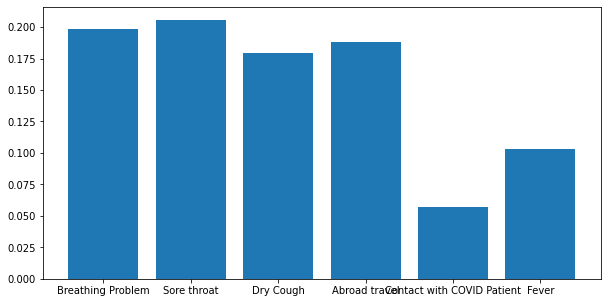

In [401]:
plt.figure(figsize=(10, 5))
plt.bar(*zip(*importances.items()));

# Resultados

Después de haber observado que el que mejor resultados nos da es Support Vector Machine, procederemos a ejecutar el test para poder dar una accuracy definitiva de nuestro modelo

In [402]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

Aplicaremos nuestro modelo SVC con los hiperparámetros que hemos descubierto en el train ya que son los que mejor resultados nos daba en el entrenamiento del modelo.

In [403]:
svr = SVC(C = 0.31622776601683794, gamma = 100000.0, kernel = 'rbf')
svr.fit(X_train_std, y_train_std)

SVC(C=0.31622776601683794, gamma=100000.0)

Seguidamente haremos las predicciones con nuestro modelo y comprobaremos cuál es nuestra accuracy. 

Nos ha dado bastante alta, aproximadamente 97% de accuracy.

In [404]:
y_predsvr = svr.predict(X_test_std)

accuracy_score(y_test_std, y_predsvr)

0.9676232523914643

Podemos observar la matriz de confusión que nos da muy buenos resultados. Si una persona tiene COVID-19 tenemos un 100% de aciertos aunque esto puede deberse a la muestra desbalanceada que tenemos ya que tenemos más muestra de gente que tiene COVID que de gente que no tiene COVID. Si tuviéramos una muestra balanceada estos resultados cambiarían aunque se estimarían valores similares que los obtenidos.

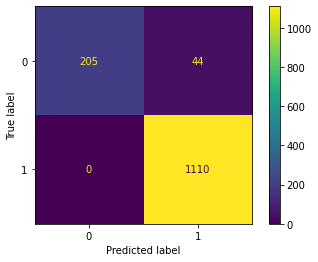

In [405]:
confusionSVC = confusion_matrix(y_test_std.values, y_predsvr)
ConfusionMatrixDisplay(confusionSVC).plot();

Este es el classification report donde podemos observar los resultados obtenidos en la matriz de confusión que he mencionado anteriormente.

In [406]:
classification_report(y_test_std, y_predsvr)

'              precision    recall  f1-score   support\n\n           0       1.00      0.82      0.90       249\n           1       0.96      1.00      0.98      1110\n\n    accuracy                           0.97      1359\n   macro avg       0.98      0.91      0.94      1359\nweighted avg       0.97      0.97      0.97      1359\n'

Para apreciar esto con mayor claridad tenemos el siiguiente código que calcula Precision, F1-Score, Recall y Accuracy donde podemos observar también resultados altos.

In [407]:
total = np.sum(confusionSVC)

TP = confusionSVC[1,1]
TN = confusionSVC[0,0]

FP = confusionSVC[0,1]
FN = confusionSVC[1,0]

precision = TP / (TP + FP)
print('Precision: ', precision)

recall = TP / (TP + FN)
print('Recall: ', recall )

F1 = 2 * TP / (2 * TP + FN + FP)
print('F1-Score: ', F1)

accuracy = (TP + TN) / (TP + FN + TN + FP)
print('Accuracy: ', accuracy)

Precision:  0.9618717504332756
Recall:  1.0
F1-Score:  0.980565371024735
Accuracy:  0.9676232523914643


# Conclusiones

En este proyecto hemos comprobado la accuracy de algunos modelos de classificación para un Dataset dado.

Los modelos que hemos testeado han sido:


> Resgresión Logística (Accuracy: 94.7%)

> Árboles de decisión (Accuracy: 95.3%)

> Support Vector Machine (Accuracy: 95.7%)

> Random Forests (Accuracy: 95.3%)

De estos 4 hemos visto que SVM era el modelo que nos proporcionaba mejores resultados, por lo tanto, hemos comprobado qué predicciones nos daría con nuestro test siendo estos resultados bastante buenos con una accuracy del 97% aproximadamente.

A pesar de estos resultados óptimos, para futuras investigaciones de estos modelos en este Dataset, deberíamos incorporar más casos de *No* en el Dataset para balancear las muestras ya que las tenemos desbalanceadas. Este desbalance puede provocar falsos resultados positivos y, por lo tanto, deberíamos corregirlo. Por otro lado, debido a los resultados positivos del modelo en todos sus aspectos lo más probable es que cuando balanceemos las muestras los resultados seguirían siendo óptimos y la accuracy no bajaría demasiado.








